В этом домашнем задании предлагается проделать несколько упражнений на NumPy для закрепления материала

**Ex 0:** (Ex for exercise)

Импортируйте NumPy как `np`. Выясните, какая версия NumPy у вас установлена (погуглите, как. есть способ, работающий для любого пакета).

In [2]:
import numpy as np

In [4]:
np.__version__

'1.21.3'

**Ex 1:** 

Команда ниже создает массив `a` из 10 случайных чисел (float-ов). Давайте посмотрим, насколько "экономнее" хранить его как NumPy-массив (а не как `list(a)`) – будем генерировать `a` из 10, 100, ..., $10^6$ таких случайных чисел, и будем смотреть на долю размера `a` от размера `list(a)`.

_Размер в памяти какого-то обьекта в Python можно определить функцией из библиотеки `sys` – системных утилит._

In [5]:
import sys

In [14]:
for size in [10**i for i in range(1, 7)]:
    a = np.random.random((size))
    a_list = list(a)
    print(f"""Длина массива {size}: 
    размер np.array {sys.getsizeof(a)}, размер python list: {sys.getsizeof(a_list)}. Доля занимаемой памяти a_list / a: {sys.getsizeof(a_list) / sys.getsizeof(a)}""")

Длина массива 10: 
    размер np.array 184, размер python list: 136. Доля занимаемой памяти a_list / a: 0.7391304347826086
Длина массива 100: 
    размер np.array 904, размер python list: 856. Доля занимаемой памяти a_list / a: 0.9469026548672567
Длина массива 1000: 
    размер np.array 8104, размер python list: 8056. Доля занимаемой памяти a_list / a: 0.9940769990128332
Длина массива 10000: 
    размер np.array 80104, размер python list: 80056. Доля занимаемой памяти a_list / a: 0.9994007789873165
Длина массива 100000: 
    размер np.array 800104, размер python list: 800056. Доля занимаемой памяти a_list / a: 0.9999400077989862
Длина массива 1000000: 
    размер np.array 8000104, размер python list: 8000056. Доля занимаемой памяти a_list / a: 0.999994000077999


**Ex 2:** 

То же самое, только давайте брать (одномерные) массивы размера $10^2,~10^4,~10^6$, переводить их в двумерные размеров $(10,10),~(10^2,10^2),~(10^3,10^3),$ и сравнивать размер двумерного массива `a` и соответствующего (вложенного) листа листов.

_Если из одномерного массива `a` лист можно получить просто функцией `list(a)`, то для двумерного массива `a2` функция `list(a2)` вернет лист numpy-массивов – надо каждый из них, в свою очередь, превратить в лист. Тут поможет, например, техника list comprehension_

In [15]:
for size in [10**i for i in range(2, 7, 2)]:
    a = np.random.random((size))
    a = a.reshape(-1, 2)
    a_list = list([list(row) for row in a])
    print(f"Длина массива {size} - размер np.array {sys.getsizeof(a)}, размер python list: {sys.getsizeof(a_list)}")

Длина массива 100 - размер np.array 120, размер python list: 456
Длина массива 10000 - размер np.array 120, размер python list: 40056
Длина массива 1000000 - размер np.array 120, размер python list: 4000056


**Ex. 3**

Напишите функцию _(тут поможет техника list comprehension)_ , которая, получив на вход лист из `n` чисел, $(x_1, x_2, ..., x_n)$, строит матрицу Ван-дер-Монда:

$$M(x_1,x_2,...,x_n)=\begin{pmatrix}
1 & x_1 & x_1^2 & ... & x_1^{n-1}\\
1 & x_2 & x_2^2 & ... & x_2^{n-1}\\
... & ... & ... & ... & ... \\
1 & x_n & x_n^2 & ... & x_n^{n-1}\\
\end{pmatrix}$$

и возвращает ее определитель. Определитель матрицы `a` (двумерного numpy-массива) можно посчитать функцией `np.linalg.det(a)`.

Проверьте, что вы не ошиблись, сравнив с явной формулой для определителя Ван-дер-Монда:

$$\det M(x_1,x_2,...,x_n) = \prod_{1\leq j < i \leq n} (x_i - x_j) $$

In [49]:
n = 3
a = np.random.random((n))
a_col = a.reshape(-1, 1)
matrix = np.repeat(a_col, n, axis=1)
matrix_van_de_mord = np.array([matrix[:, 1] ** i for i in range(n)]).T

In [50]:
det = np.linalg.det(matrix_van_de_mord)

In [51]:
det

0.04205188306283216

In [52]:
real_det = 1
for i in range(n):
    for j in range(n):
        if j < i:
            real_det *= a[i] - a[j]

In [53]:
real_det

0.04205188306283217

**Ex 4** 

Создайте массив `a` случайных чисел `np.random.randn()` размеров (10,10,10). Найдите наибольший и наименьший элемент. Найдите сумму всех положительных элементов.  

In [57]:
a = np.random.randn(10, 10, 10)

In [63]:
a.max(), a.min()

(2.7794002521903036, -3.838956240418659)

In [65]:
a[a > 0].sum()

380.8887137814306

**Ex 5** 

То же самое, только возьмите срез массива `a`: от осей с нечетными номерами (пусть у нас оси (1ая, 2я, 3я)) пробегите (и возьмите в срез) по всем нечетным значения индекса, а от 2ой оси – (индекс пробегает (0,1,...,9)) возьмите значения индекса от 3 до 7 (включительно).

In [122]:
a = np.random.randn(10, 10, 10)

In [124]:
new_a = a[ 1::2 , 3:8 , 1::2 ]

In [125]:
new_a.max(), new_a.min()

(2.1841975571339227, -2.141607696053549)

In [126]:
new_a[new_a > 0].sum()

60.285030754372094

**Ex 6** 

_**(Сначала пара подсказок)**_

_Вот так можно отобразить элементы матрицы. Цветовую схему я выбрал оттенки серого, т.к значения тут все положительные._

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

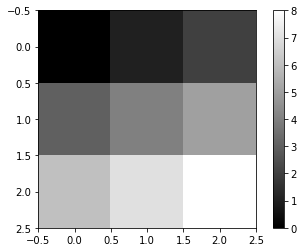

In [105]:
a = np.arange(9).reshape(3,3)

plt.imshow(a, cmap = 'gray')
plt.colorbar()

_Допустим, вы хотите построить вот такой "график" (вид сверху, интенсивность серого кодирует высоту графика) функции от двух переменных, $x$ и $y$. Вы хотите, чтобы $x$ и $y$ принимали значения от $0$ до $1$, и вам достаточно в этом интервале вычислить функцию в 100 точках (10 шагов по $x$, 10 шагов по $y$, итого шаг решетки – $0.1$). Вот, как это можно сделать (командой `np.meshgrid()`):_

In [106]:
ps = np.arange(0,1,0.1)

xs, ys = np.meshgrid(ps,ps)

_(Посмотрите, как выглядят массивы `xs` и `ys`)_

**_Теперь задание:_**
Постройте вот такой "двумерный" график в оттенках серого функции $I(x,y)$ (I for intensity) расстояния от центра координат 

$$I = \sqrt{x^2 + y^2}$$

Для $(x,y)$ от $-1$ до $1$, с шагом 0.05.

Покажите на этом графике область, где $I < 0.5$

_(Если интенсивность идет от белого к черному с возрастанием значения – поменяйте знак всего массива интенсивностей, чтобы область $I < 0.5$ была окрашена оттенками серого, а внешняя часть – была белой_

In [116]:
ps = np.arange(-1,1,0.05)

xs, ys = np.meshgrid(ps,ps)

In [117]:
I = np.sqrt(xs ** 2 + ys ** 2)

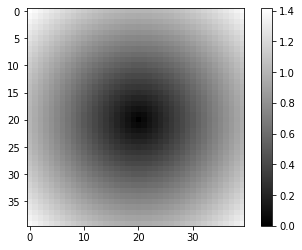

In [118]:
plt.imshow(I, cmap = 'gray')
plt.colorbar()